# Pretrained model for cifar

Instead of fitting a model, use the VGG16 for making cifar predictions, evaluate the model, using VGG16 (use Imagenet weights)

What happens? is it better or worse than the one you created? 

In [1]:
from tensorflow.keras.applications import vgg16

base_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [2]:
from tensorflow.keras import models, layers

add_model = models.Sequential([
    layers.Flatten(input_shape=base_model.output_shape[1:]),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax') # hay 10 clases posibles
])

model = models.Model(inputs=base_model.input, outputs=add_model(base_model.output))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [3]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.callbacks import EarlyStopping

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train_norm = X_train / 255
X_test_norm = X_test / 255
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

EarlyStopping_CallBack = [EarlyStopping(monitor='val_loss',  min_delta=0, patience=3, verbose=0, mode='auto', baseline=None)]

history = model.fit(X_train_norm, y_train, epochs=20, batch_size=128, callbacks=EarlyStopping_CallBack, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 25s 619us/sample - loss: 1.9019 - accuracy: 0.2400 - val_loss: 1.6051 - val_accuracy: 0.3606
Epoch 2/20
40000/40000 [==============================] - 21s 529us/sample - loss: 1.3513 - accuracy: 0.4780 - val_loss: 1.2856 - val_accuracy: 0.5335
Epoch 3/20
40000/40000 [==============================] - 21s 523us/sample - loss: 0.9962 - accuracy: 0.6446 - val_loss: 0.8710 - val_accuracy: 0.6961
Epoch 4/20
40000/40000 [==============================] - 21s 517us/sample - loss: 0.7883 - accuracy: 0.7299 - val_loss: 0.8072 - val_accuracy: 0.7249
Epoch 5/20
40000/40000 [==============================] - 21s 517us/sample - loss: 0.6481 - accuracy: 0.7818 - val_loss: 0.7798 - val_accuracy: 0.7539
Epoch 6/20
40000/40000 [==============================] - 21s 517us/sample - loss: 0.5307 - accuracy: 0.8218 - val_loss: 0.7205 - val_accuracy: 0.7685
Epoch 7/20
40000/40000 [====================

In [4]:
# model evaluation
scores = model.evaluate(X_test_norm, y_test)
print('Accuracy: ', scores[1])

10000/10000 [==============================] - 3s 345us/sample - loss: 0.7682 - accuracy: 0.7895
Accuracy:  0.7895


# try doing the same with any other pretrained network available on tensorflow!

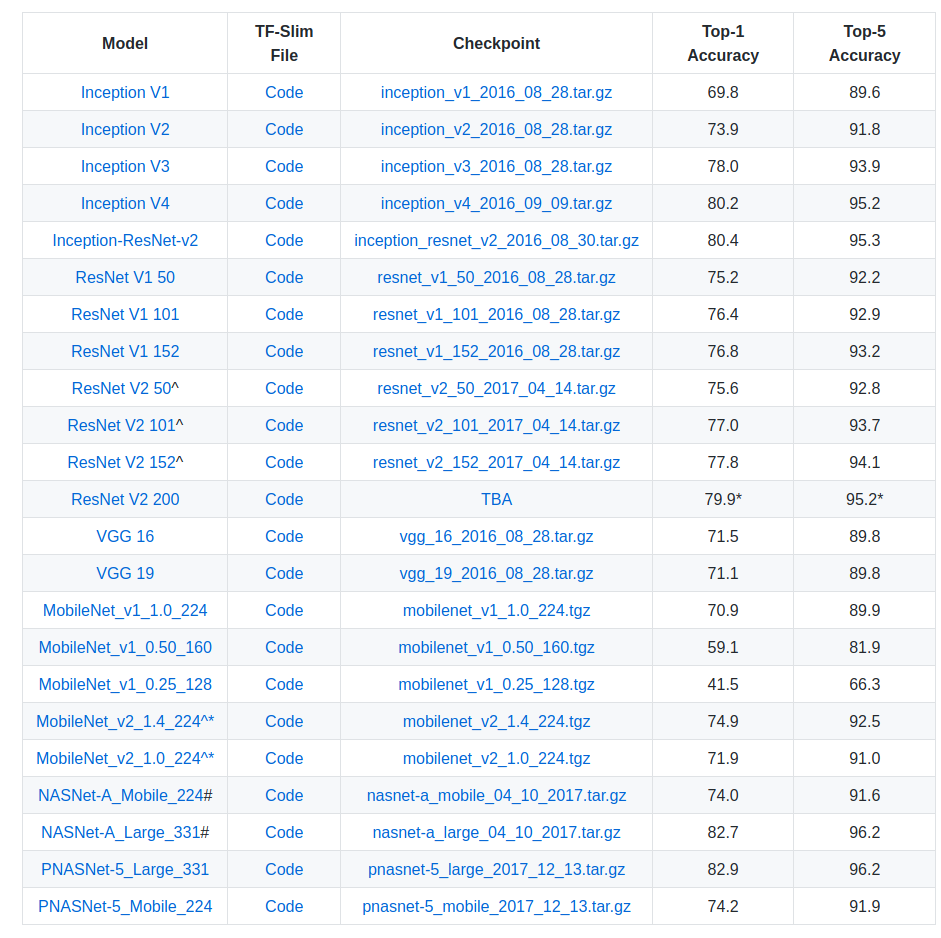

In [5]:
from tensorflow.keras.applications import vgg19

base_model = vgg19.VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [6]:
from tensorflow.keras import models, layers

add_model = models.Sequential([
    layers.Flatten(input_shape=base_model.output_shape[1:]),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax') # hay 10 clases posibles
])

model = models.Model(inputs=base_model.input, outputs=add_model(base_model.output))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

In [7]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.callbacks import EarlyStopping

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train_norm = X_train / 255
X_test_norm = X_test / 255
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

EarlyStopping_CallBack = [EarlyStopping(monitor='val_loss',  min_delta=0, patience=3, verbose=0, mode='auto', baseline=None)]

history = model.fit(X_train_norm, y_train, epochs=20, batch_size=128, callbacks=EarlyStopping_CallBack, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 29s 721us/sample - loss: 1.9551 - accuracy: 0.2139 - val_loss: 1.8184 - val_accuracy: 0.2631
Epoch 2/20
40000/40000 [==============================] - 29s 730us/sample - loss: 1.6135 - accuracy: 0.3604 - val_loss: 1.3805 - val_accuracy: 0.4724
Epoch 3/20
40000/40000 [==============================] - 29s 716us/sample - loss: 1.2842 - accuracy: 0.5141 - val_loss: 1.2178 - val_accuracy: 0.5551
Epoch 4/20
40000/40000 [==============================] - 28s 711us/sample - loss: 1.0359 - accuracy: 0.6255 - val_loss: 1.0746 - val_accuracy: 0.6175
Epoch 5/20
40000/40000 [==============================] - 28s 706us/sample - loss: 0.9079 - accuracy: 0.6855 - val_loss: 0.8936 - val_accuracy: 0.6945
Epoch 6/20
40000/40000 [==============================] - 28s 702us/sample - loss: 0.7623 - accuracy: 0.7384 - val_loss: 0.8058 - val_accuracy: 0.7317
Epoch 7/20
40000/40000 [====================

In [8]:
# model evaluation
scores = model.evaluate(X_test_norm, y_test)
print('Accuracy: ', scores[1])

10000/10000 [==============================] - 4s 400us/sample - loss: 0.7736 - accuracy: 0.7750
Accuracy:  0.775
